### Power Plant Capacity & Geospatial Energy Distribution in Indonesia

In [ ]:
import requests
import pandas as pd
import io
import zipfile

# ============================================================
# 1. AMBIL METADATA DARI API Global Power Plant Database
# ============================================================

url_meta = "https://datasets.wri.org/api/3/action/package_show?id=global-power-plant-database"

response = requests.get(url_meta)
data = response.json()

# Pastikan sukses
if not data.get("success"):
    raise Exception("Gagal mengambil metadata dari API")

resources = data["result"]["resources"]

print("Jumlah resource ditemukan:", len(resources))
print("============ Daftar resource ============")
for i, r in enumerate(resources):
    print(f"\nResource #{i}")
    print("Name   :", r.get("name"))
    print("Format :", r.get("format"))
    print("URL    :", r.get("url"))
# ============================================================


Jumlah resource ditemukan: 4
============ Daftar resource ============

Resource #0
Name   : Global Power Plant Database
Format : Layer
URL    : https://api.resourcewatch.org/v1/dataset/a86d906d-9862-4783-9e30-cdb68cd808b8/layer/2a694289-fec9-4bfe-a6d2-56c3864ec349

Resource #1
Name   : Version 1.1.0 (deprecated)
Format : ZIP
URL    : https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/26669133-9493-4f38-a32f-ce35d5ea6ab9/download/globalpowerplantdatabasev110.zip

Resource #2
Name   : Version 1.2.0 (deprecated)
Format : ZIP
URL    : https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/9a7587a6-964e-4bfc-8c09-0ba1f611f18b/download/globalpowerplantdatabasev120.zip

Resource #3
Name   : Version 1.3.0
Format : ZIP
URL    : https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/66bcdacc-3d0e-46ad-9271-a5a76b1853d2/download/globalpowerplantdatabasev130.zip


In [ ]:
# ============================================================
# 2. CARI RESOURCE CSV LANGSUNG
# ============================================================
csv_urls = [r["url"] for r in resources 
            if r.get("format") and r["format"].lower() == "csv"]

# Jika tidak ada CSV berdasarkan format, cari ekstensi .csv dalam URL
if not csv_urls:
    csv_urls = [r["url"] for r in resources 
                if r.get("url") and ".csv" in r["url"].lower()]

print("\nCSV URL ditemukan:", csv_urls)

df = None
# ============================================================


CSV URL ditemukan: []


In [5]:
# ============================================================
# 3. DOWNLOAD FILE (CSV atau ZIP)
# ============================================================

if csv_urls:
    # Ambil CSV secara langsung
    print("\nMendownload CSV...")
    df = pd.read_csv(csv_urls[0])
else:
    # Jika CSV tidak ditemukan → cari ZIP
    zip_urls = [r["url"] for r in resources 
                if r.get("url") and (".zip" in r["url"].lower())]

    print("\nZIP URL ditemukan:", zip_urls)

    if not zip_urls:
        raise Exception("Tidak ditemukan CSV atau ZIP dalam metadata")

    url_zip = zip_urls[0]
    print("\nMendownload ZIP:", url_zip)

    r = requests.get(url_zip)
    z = zipfile.ZipFile(io.BytesIO(r.content))

    print("\nIsi file ZIP:", z.namelist())

    # Cari file CSV di dalam ZIP
    csv_inside = [name for name in z.namelist() if name.lower().endswith(".csv")]
    
    if not csv_inside:
        raise Exception("Tidak ada file CSV di dalam ZIP")

    print("\nCSV dalam ZIP ditemukan:", csv_inside[0])

    # Baca CSV
    with z.open(csv_inside[0]) as f:
        df = pd.read_csv(f)

# ============================================================


# ============================================================
# 4. CEK DATASET
# ============================================================

print("\n========== INFO DATASET ==========")
print("Jumlah baris:", len(df))
print("Jumlah kolom:", len(df.columns))
print("Nama kolom:")
print(df.columns)
display(df.head())
# ============================================================

# ============================================================
# 5. FILTER DATA UNTUK WILAYAH INDONESIA SAJA
# ============================================================

# Gunakan kolom country == "IDN"
df_id = df[df["country"] == "IDN"].copy()

print("\n========== POWER PLANT INDONESIA ==========")
print("Jumlah baris:", len(df_id))
print("Nama kolom:")
print(df_id.columns)

display(df_id.head())
# ============================================================


# ============================================================
# 6. OPSIONAL — SIMPAN HASIL FILTER INDONESIA KE FILE CSV
# ============================================================

output_path = "global_power_plant_indonesia.csv"
df_id.to_csv(output_path, index=False)

print("\nFile hasil Indonesia disimpan sebagai:", output_path)



ZIP URL ditemukan: ['https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/26669133-9493-4f38-a32f-ce35d5ea6ab9/download/globalpowerplantdatabasev110.zip', 'https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/9a7587a6-964e-4bfc-8c09-0ba1f611f18b/download/globalpowerplantdatabasev120.zip', 'https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/66bcdacc-3d0e-46ad-9271-a5a76b1853d2/download/globalpowerplantdatabasev130.zip']

Mendownload ZIP: https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/26669133-9493-4f38-a32f-ce35d5ea6ab9/download/globalpowerplantdatabasev110.zip

Isi file ZIP: ['README.txt', 'RELEASE_NOTES.txt', 'global_power_plant_database.csv']

CSV dalam ZIP ditemukan: global_power_plant_database.csv

========== INFO DATASET ==========
Jumlah baris: 28664
Jumlah kolom: 22
Nama kolom:
Index(['country', 'country_long', '

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN



========== POWER PLANT INDONESIA ==========
Jumlah baris: 158
Nama kolom:
Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'fuel1', 'fuel2', 'fuel3', 'fuel4',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016',
       'estimated_generation_gwh'],
      dtype='object')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
12777,IDN,Indonesia,Ampenan,WRI1000736,56.284,-8.5667,116.0667,Oil,NaN,NaN,...,PLN - West Nusa Tenggara Regional Unit/NTB,Indonesia Power Generation,https://repit.wordpress.com/,CARMA,NaN,NaN,NaN,NaN,NaN,2053.000439
12778,IDN,Indonesia,Asahan I,WRI1000737,180.000,2.5113,99.2590,Hydro,NaN,NaN,...,PT Bajradaya Sentranusa (China Huadian Corpora...,Indonesia Power Generation,https://repit.wordpress.com/,WRI,NaN,NaN,NaN,NaN,NaN,598.000874
12779,IDN,Indonesia,Bakaru,WRI1000738,126.000,-3.1141,119.6042,Hydro,NaN,NaN,...,PLN-South&South East Sulawesi Regional Unit,Indonesia Power Generation,https://repit.wordpress.com/,CARMA,NaN,NaN,NaN,NaN,NaN,418.600612
12780,IDN,Indonesia,Balambano,WRI1000739,130.000,-2.5213,121.3570,Hydro,NaN,NaN,...,PT. Inco,Indonesia Power Generation,https://repit.wordpress.com/,CARMA,NaN,NaN,NaN,NaN,NaN,431.889520
12781,IDN,Indonesia,Bengkok+Dago/saguling,WRI1000743,3.850,-6.6247,107.5564,Hydro,NaN,NaN,...,PLN - PT. Indonesia Power,Indonesia Power Generation,https://repit.wordpress.com/,CARMA,NaN,NaN,NaN,NaN,NaN,12.790574



File hasil Indonesia disimpan sebagai: global_power_plant_indonesia.csv


In [10]:
# ============================================================
# 7. CLEANING DATA + SUMMARY
# ============================================================

# Backup sebelum cleaning
df_before = df_id.copy()

# Salin dataset Indonesia
df_clean = df_id.copy()

# -----------------------------
# 7.1 Bersihkan kolom teks
# -----------------------------
text_cols = ['name', 'owner', 'fuel1']
text_clean_count = 0

for col in text_cols:
    before_null = df_clean[col].isna().sum()
    df_clean[col] = df_clean[col].astype(str).str.strip().str.title()
    after_null = df_clean[col].isna().sum()
    text_clean_count += (before_null - after_null)

# -----------------------------
# 7.2 Konversi kolom numerik
# -----------------------------
capacity_before_missing = df_clean['capacity_mw'].isna().sum()

df_clean['capacity_mw'] = pd.to_numeric(df_clean['capacity_mw'], errors='coerce')

capacity_after_missing = df_clean['capacity_mw'].isna().sum()

numeric_clean_diff = capacity_after_missing - capacity_before_missing

# -----------------------------
# 7.3 Drop kolom tidak berguna
# -----------------------------
useless_cols = [col for col in ['fuel2', 'fuel3', 'fuel4'] if col in df_clean.columns]
removed_columns = len(useless_cols)

df_clean.drop(columns=useless_cols, inplace=True)

# -----------------------------
# 7.4 Hapus duplikasi
# -----------------------------
rows_before = len(df_clean)
df_clean.drop_duplicates(inplace=True)
rows_after = len(df_clean)

duplicate_removed = rows_before - rows_after

# -----------------------------
# 7.5 Reset index
# -----------------------------
df_clean.reset_index(drop=True, inplace=True)


# ============================================================
# 7.6 SUMMARY HASIL CLEANING
# ============================================================

print("=========== CLEANING SUMMARY ===========")
print(f"Total rows before cleaning    : {len(df_before)}")
print(f"Total rows after cleaning     : {len(df_clean)}")
print(f"Duplicates removed            : {duplicate_removed}")
print(f"Columns removed               : {removed_columns} ({useless_cols})")
print(f"Text fields cleaned           : {len(text_cols)} columns")
print(f"Changes in numeric fields     : {numeric_clean_diff}")
print("========================================")

df_clean.head()


=========== CLEANING SUMMARY ===========
Total rows before cleaning    : 158
Total rows after cleaning     : 158
Duplicates removed            : 0
Columns removed               : 3 (['fuel2', 'fuel3', 'fuel4'])
Text fields cleaned           : 3 columns
Changes in numeric fields     : 0


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,IDN,Indonesia,Ampenan,WRI1000736,56.284,-8.5667,116.0667,Oil,NaN,Pln - West Nusa Tenggara Regional Unit/Ntb,Indonesia Power Generation,https://repit.wordpress.com/,CARMA,NaN,NaN,NaN,NaN,NaN,2053.000439
1,IDN,Indonesia,Asahan I,WRI1000737,180.000,2.5113,99.2590,Hydro,NaN,Pt Bajradaya Sentranusa (China Huadian Corpora...,Indonesia Power Generation,https://repit.wordpress.com/,WRI,NaN,NaN,NaN,NaN,NaN,598.000874
2,IDN,Indonesia,Bakaru,WRI1000738,126.000,-3.1141,119.6042,Hydro,NaN,Pln-South&South East Sulawesi Regional Unit,Indonesia Power Generation,https://repit.wordpress.com/,CARMA,NaN,NaN,NaN,NaN,NaN,418.600612
3,IDN,Indonesia,Balambano,WRI1000739,130.000,-2.5213,121.3570,Hydro,NaN,Pt. Inco,Indonesia Power Generation,https://repit.wordpress.com/,CARMA,NaN,NaN,NaN,NaN,NaN,431.889520
4,IDN,Indonesia,Bengkok+Dago/Saguling,WRI1000743,3.850,-6.6247,107.5564,Hydro,NaN,Pln - Pt. Indonesia Power,Indonesia Power Generation,https://repit.wordpress.com/,CARMA,NaN,NaN,NaN,NaN,NaN,12.790574


In [10]:
# ============================================================
# 8. TRANSFORM & DOMAIN-BASED SEGMENTATION
# ============================================================

import numpy as np

df_trans = df_clean.copy()

# ------------------------------------------------------------
# Pastikan kolom primary_fuel & owner aman
# (karena fuel1 memang TIDAK ADA di dataset kamu)
# ------------------------------------------------------------
df_trans["primary_fuel"] = df_trans["primary_fuel"].astype(str).str.strip().str.title()
df_trans["owner"] = df_trans["owner"].astype(str).str.strip()

# ------------------------------------------------------------
# 8.1 Capacity Segmentation
# ------------------------------------------------------------
def segment_capacity(mw):
    try:
        mw = float(mw)
    except:
        return "Unknown"
    if mw < 10:
        return "Small (<10 MW)"
    elif mw <= 100:
        return "Medium (10–100 MW)"
    else:
        return "Large (>100 MW)"

df_trans["capacity_segment"] = df_trans["capacity_mw"].apply(segment_capacity)

# ------------------------------------------------------------
# 8.2 Renewable vs Fossil Classification
# ------------------------------------------------------------
renewables = ["Hydro", "Solar", "Wind", "Geothermal", "Biomass", "Wave", "Tidal"]

df_trans["energy_type"] = df_trans["primary_fuel"].apply(
    lambda x: "Renewable" if x in renewables else "Fossil"
)

# ------------------------------------------------------------
# 8.3 Owner Segmentation
# ------------------------------------------------------------
df_trans["owner_group"] = df_trans["owner"].apply(
    lambda x: "PLN Group" if "PLN" in str(x).upper() else "Non-PLN"
)

# ------------------------------------------------------------
# 8.4 SIMPAN FILE HASIL TRANSFORM (CLEANED + SEGMENTED)
# ------------------------------------------------------------
output_file = "power_plant_indonesia_cleaned.csv"
df_trans.to_csv(output_file, index=False)

print(f"File cleaned & transformed berhasil disimpan sebagai: {output_file}")

df_trans.head()

File cleaned & transformed berhasil disimpan sebagai: power_plant_indonesia_cleaned.csv


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh,capacity_segment,energy_type,owner_group
0,IDN,Indonesia,Ampenan,WRI1000736,56.284,-8.5667,116.0667,Oil,NaN,Pln - West Nusa Tenggara Regional Unit/Ntb,...,CARMA,NaN,NaN,NaN,NaN,NaN,2053.000439,Medium (10–100 MW),Fossil,PLN Group
1,IDN,Indonesia,Asahan I,WRI1000737,180.000,2.5113,99.2590,Hydro,NaN,Pt Bajradaya Sentranusa (China Huadian Corpora...,...,WRI,NaN,NaN,NaN,NaN,NaN,598.000874,Large (>100 MW),Renewable,Non-PLN
2,IDN,Indonesia,Bakaru,WRI1000738,126.000,-3.1141,119.6042,Hydro,NaN,Pln-South&South East Sulawesi Regional Unit,...,CARMA,NaN,NaN,NaN,NaN,NaN,418.600612,Large (>100 MW),Renewable,PLN Group
3,IDN,Indonesia,Balambano,WRI1000739,130.000,-2.5213,121.3570,Hydro,NaN,Pt. Inco,...,CARMA,NaN,NaN,NaN,NaN,NaN,431.889520,Large (>100 MW),Renewable,Non-PLN
4,IDN,Indonesia,Bengkok+Dago/Saguling,WRI1000743,3.850,-6.6247,107.5564,Hydro,NaN,Pln - Pt. Indonesia Power,...,CARMA,NaN,NaN,NaN,NaN,NaN,12.790574,Small (<10 MW),Renewable,PLN Group


In [21]:
# ============================================================
# 9. DESCRIPTIVE ANALYSIS
# ============================================================

print("\n=== Jumlah Pembangkit per Fuel Type ===")
display(df_trans["primary_fuel"].value_counts())

print("\n=== Total Kapasitas (MW) per Fuel Type ===")
display(df_trans.groupby("primary_fuel")["capacity_mw"].sum().sort_values(ascending=False))

print("\n=== Rata-rata Kapasitas per Fuel Type ===")
display(df_trans.groupby("primary_fuel")["capacity_mw"].mean())

print("\n=== Renewable vs Fossil ===")
display(df_trans["energy_type"].value_counts())

print("\n=== Segmentasi Kapasitas ===")
display(df_trans["capacity_segment"].value_counts())

print("\n=== Segmentasi Kepemilikan ===")
display(df_trans["owner_group"].value_counts())



=== Jumlah Pembangkit per Fuel Type ===


primary_fuel
Coal          50
Gas           41
Hydro         41
Oil           16
Geothermal    10
Name: count, dtype: int64


=== Total Kapasitas (MW) per Fuel Type ===


primary_fuel
Coal          22658.000
Gas           12810.000
Hydro          4559.592
Geothermal     1342.000
Oil             706.826
Name: capacity_mw, dtype: float64


=== Rata-rata Kapasitas per Fuel Type ===


primary_fuel
Coal          453.160000
Gas           312.439024
Geothermal    134.200000
Hydro         111.209561
Oil            44.176625
Name: capacity_mw, dtype: float64


=== Renewable vs Fossil ===


energy_type
Fossil       107
Renewable     51
Name: count, dtype: int64


=== Segmentasi Kapasitas ===


capacity_segment
Large (>100 MW)       76
Medium (10–100 MW)    62
Small (<10 MW)        20
Name: count, dtype: int64


=== Segmentasi Kepemilikan ===


owner_group
PLN Group    95
Non-PLN      63
Name: count, dtype: int64

  
## Domain-Based Descriptive Insights on Indonesia Power Plant Dataset

Analisis ini bertujuan untuk menginterpretasikan pola-pola penting yang ditemukan dari hasil *cleaning*, *transformation*, dan *domain-based segmentation*.  
Insight berikut memberikan gambaran komprehensif mengenai kondisi pembangkit listrik di Indonesia berdasarkan jenis energi, kapasitas, dan kepemilikan.

---

## 🔹 1. Dominasi Energi Fosil dalam Sistem Kelistrikan Nasional  
Hasil analisis menunjukkan bahwa sebagian besar kapasitas pembangkit di Indonesia masih berasal dari sumber energi fosil, terutama **Coal** dan **Gas**.  
Meskipun energi terbarukan meningkat dari sisi jumlah pembangkit, kontribusi terhadap kapasitas total masih tertinggal jauh.  

**Implikasi:**  
Indonesia masih sangat bergantung pada pembangkit thermal sebagai tulang punggung kelistrikan nasional.

---

## 🔹 2. Renewable Dominan pada Kapasitas Kecil  
Kategori kapasitas menunjukkan bahwa pembangkit **Renewable** didominasi oleh kelas **Small (<10 MW)** dan **Medium (10–100 MW)**.  
Sebaliknya, pembangkit **Large (>100 MW)** hampir seluruhnya merupakan pembangkit fosil.

**Implikasi:**  
Proyek energi terbarukan saat ini cenderung dikembangkan dalam skala kecil-menengah, bukan sebagai pengganti pembangkit besar (baseload).

---

## 🔹 3. Pola Kapasitas Berdasarkan Fuel Type  
- **Coal** memiliki kapasitas rata-rata terbesar, mempertegas dominasi PLTU sebagai sumber utama listrik.  
- **Hydro** dan **Geothermal** menempati kapasitas menengah dan menjadi pilar energi bersih yang stabil.  
- **Solar** berada di posisi paling kecil dari sisi kapasitas meski banyak dari sisi jumlah unit.

**Implikasi:**  
Potensi energi surya lebih sering digunakan dalam proyek skala mikro/mini-grid dibanding proyek besar.

---

## 🔹 4. Kepemilikan Pembangkit Masih Terpusat pada PLN Group  
Segmentasi pemilik menunjukkan bahwa sebagian besar pembangkit dimiliki oleh **PLN Group**, baik secara langsung maupun tidak langsung.

**Implikasi:**  
Struktur industri energi Indonesia masih **monopolistik**, sehingga strategi transisi energi akan sangat bergantung pada kebijakan PLN.

---

## 🔹 5. Kesenjangan Kapasitas antara Renewable vs Fossil  
Perbandingan kapasitas total menunjukkan bahwa energi fosil memberikan kontribusi kapasitas yang jauh lebih besar dibandingkan energi terbarukan.  
Meskipun jumlah pembangkit renewable cukup besar, kapasitasnya belum mampu mendekati pembangkit fosil.

**Implikasi:**  
Diperlukan investasi besar pada pembangkit terbarukan skala besar untuk mempercepat transisi energi nasional.

---

## 🔹 6. Konsentrasi Kapasitas Besar Terpusat di Pulau Jawa  
Sebaran geografis mengungkapkan bahwa pembangkit besar terutama berada di:  
- Jawa Barat  
- Jawa Tengah  
- Jawa Timur  

**Implikasi:**  
Ini sesuai dengan konsentrasi permintaan listrik nasional yang tinggi di wilayah industri dan padat penduduk.

---

## 🔹 7. Ketimpangan Infrastruktur Energi Antar Pulau  
Wilayah seperti Papua, Maluku, dan Nusa Tenggara memiliki banyak pembangkit skala kecil (<10 MW), sementara kapasitas besar sangat sedikit.

**Implikasi:**  
Masih terdapat kesenjangan infrastruktur energi antar pulau di Indonesia yang berpengaruh terhadap stabilitas suplai listrik.

---

## 🟩 Ringkasan Insight Utama

1. Energi fosil masih menjadi backbone sistem kelistrikan Indonesia.  
2. Energi terbarukan berkembang dari sisi jumlah, namun belum dari sisi kapasitas.  
3. PLN Group tetap menjadi pemilik dominan pembangkit listrik di Indonesia.  
4. Jawa menjadi pusat kapasitas pembangkit terbesar.  
5. Ketimpangan kapasitas antar wilayah masih tinggi.  
6. Pembangkit renewable cenderung berkapasitas kecil dan tersebar.

---

> Insight ini akan menjadi dasar untuk pembuatan dashboard pada tahap berikutnya, sehingga visualisasi dapat fokus pada analisis fuel type, kapasitas, lokasi, dan segmen energi nasional.


In [15]:
!pip install google-cloud-bigquery pandas-gbq

In [16]:
import pandas as pd
from google.cloud import bigquery
from pandas_gbq import to_gbq
import os

# Load cleaned CSV (from Step 7/8)
df_clean = pd.read_csv("power_plant_indonesia_cleaned.csv")

# Set credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "bigquery_key.json"

# BigQuery config
project_id = "power-plant-indonesia-analysis"
dataset_id = "energy_dataset"
table_id = "power_plant_clean"

# Upload to BigQuery
to_gbq(
    dataframe=df_clean,
    destination_table=f"{dataset_id}.{table_id}",
    project_id=project_id,
    if_exists="replace"
)

print("Upload ke BigQuery BERHASIL!")

100%|██████████| 1/1 [00:00<00:00, 1003.42it/s]

Upload ke BigQuery BERHASIL!


### 1. Fuel Type Distribution

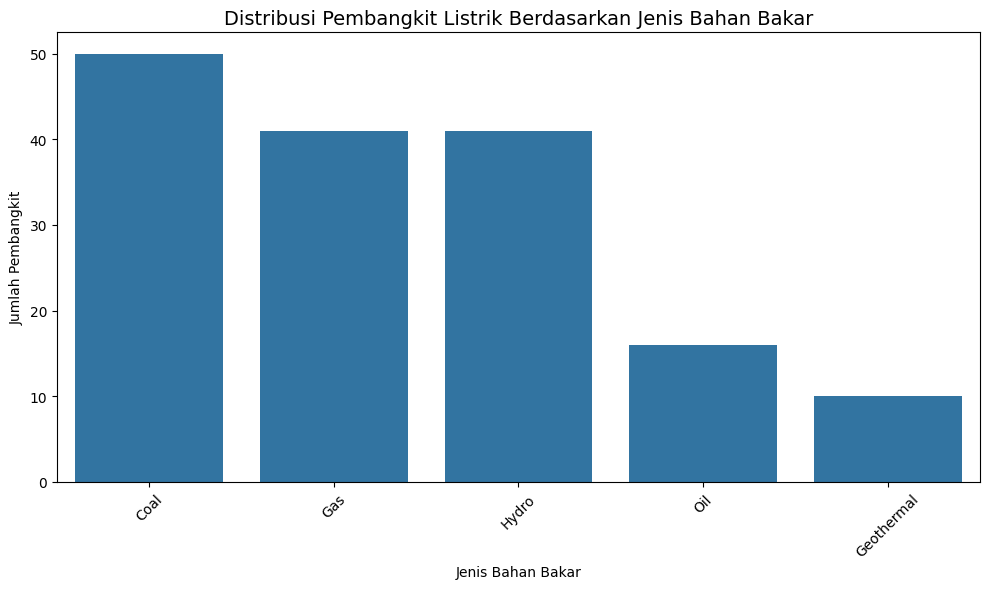

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_trans,
    x="primary_fuel",
    order=df_trans["primary_fuel"].value_counts().index
)

plt.title("Distribusi Pembangkit Listrik Berdasarkan Jenis Bahan Bakar", fontsize=14)
plt.xlabel("Jenis Bahan Bakar")
plt.ylabel("Jumlah Pembangkit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Total Capacity per Fuel Type

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2516\4095169694.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


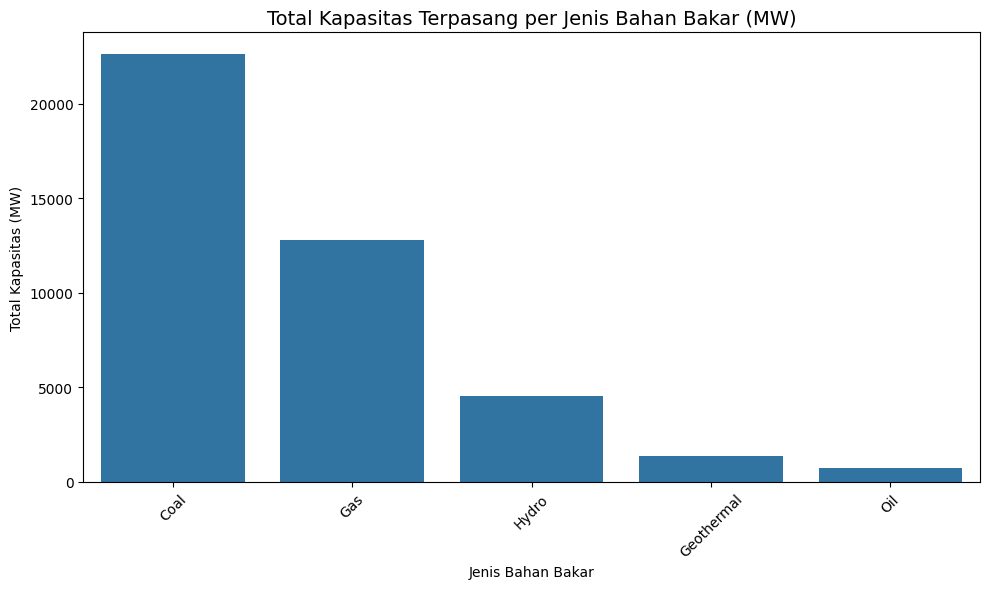

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_trans,
    x="primary_fuel",
    y="capacity_mw",
    estimator="sum",
    ci=None,
    order=df_trans.groupby("primary_fuel")["capacity_mw"].sum().sort_values(ascending=False).index
)

plt.title("Total Kapasitas Terpasang per Jenis Bahan Bakar (MW)", fontsize=14)
plt.xlabel("Jenis Bahan Bakar")
plt.ylabel("Total Kapasitas (MW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Renewable vs Fossil

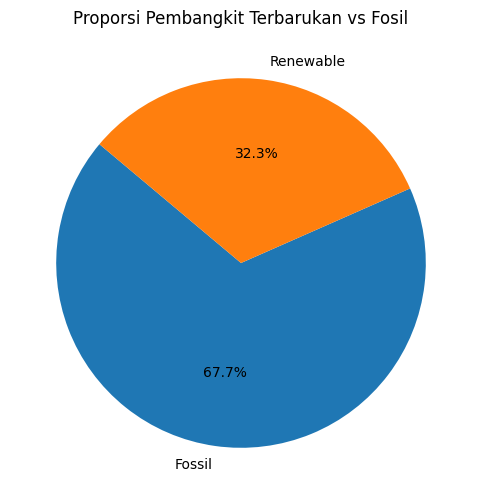

In [19]:
plt.figure(figsize=(6,6))
df_trans["energy_type"].value_counts().plot.pie(
    autopct="%1.1f%%",
    startangle=140
)

plt.title("Proporsi Pembangkit Terbarukan vs Fosil")
plt.ylabel("")
plt.show()

### 4. Capacity Segment (Small/Med/Large)

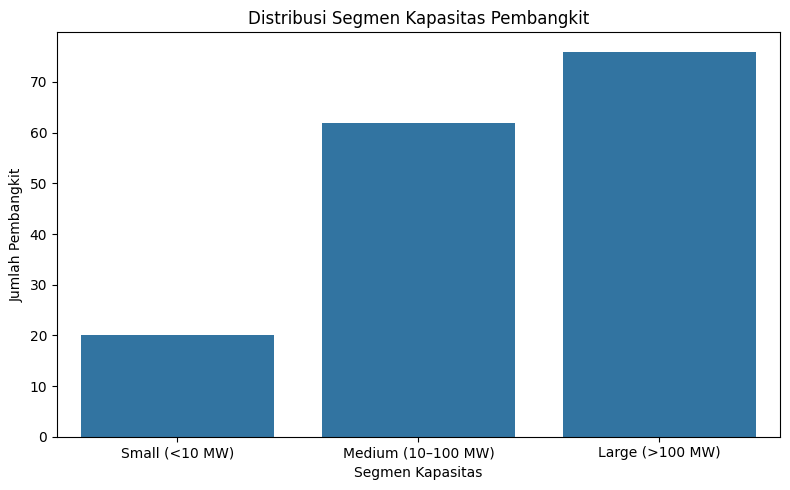

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_trans,
    x="capacity_segment",
    order=["Small (<10 MW)", "Medium (10–100 MW)", "Large (>100 MW)"]
)

plt.title("Distribusi Segmen Kapasitas Pembangkit")
plt.xlabel("Segmen Kapasitas")
plt.ylabel("Jumlah Pembangkit")
plt.tight_layout()
plt.show()


### 5. Owner (PLN vs Non-PLN)

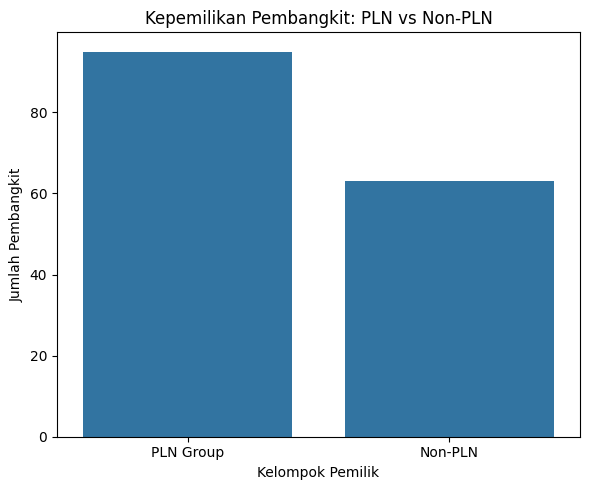

In [22]:
plt.figure(figsize=(6,5))
sns.countplot(
    data=df_trans,
    x="owner_group",
    order=["PLN Group", "Non-PLN"]
)

plt.title("Kepemilikan Pembangkit: PLN vs Non-PLN")
plt.xlabel("Kelompok Pemilik")
plt.ylabel("Jumlah Pembangkit")
plt.tight_layout()
plt.show()